<a href="https://colab.research.google.com/github/chaehyun1/Ybigta_assignment/blob/main/ybigta_0105_%ED%97%88%EA%B9%85%ED%8E%98%EC%9D%B4%EC%8A%A4_%EA%B3%BC%EC%A0%9C_%EA%B9%80%EC%B1%84%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CV model 1
- Yolos tiny
- https://huggingface.co/hustvl/yolos-tiny

In [ ]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


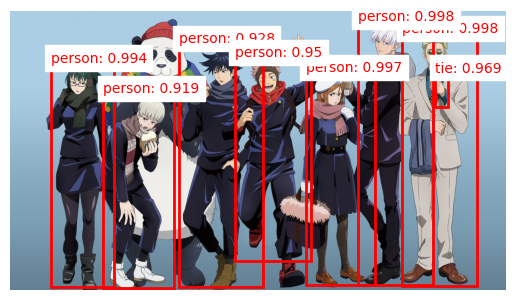

Number of detected objects: 8
Average confidence score: 0.969


In [ ]:
url = "/content/drive/MyDrive/img.jpg"
image = Image.open(url)

model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

logits = outputs.logits
bboxes = outputs.pred_boxes


# Visualize the bounding boxes on the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Display detected objects and their bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display label and confidence score
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    plt.text(box[0], box[1], label_str, color='r', backgroundcolor='w')

plt.axis('off')
# Save the result to Google Drive
result_image_path = "/content/drive/MyDrive/your_result_image.jpg"  # Replace with your desired path in Google Drive
plt.savefig(result_image_path)

# Display the result
plt.show()

# Print performance metrics
print("Number of detected objects:", len(results["scores"]))
print("Average confidence score:", round(torch.mean(results["scores"]).item(), 3))
# Add any other metrics you want to display

## CV model 2
- resnet50
- https://huggingface.co/facebook/detr-resnet-50

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

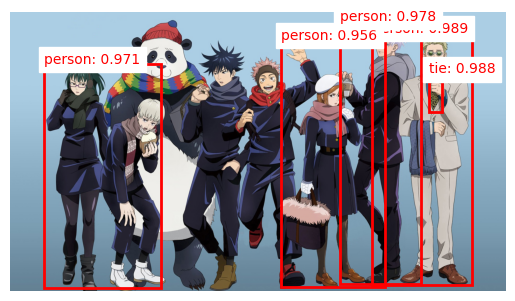

Number of detected objects: 5
Average confidence score: 0.976


In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection

url = "/content/drive/MyDrive/img.jpg"
image = Image.open(url)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Visualize the bounding boxes on the image
fig, ax = plt.subplots(1)
ax.imshow(image)

# Display detected objects and their bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    # Display label and confidence score
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    plt.text(box[0], box[1], label_str, color='r', backgroundcolor='w')

# Remove axis labels and ticks
plt.axis('off')

# Save the result to Google Drive
result_image_path = "/content/drive/MyDrive/detr_result_image.jpg"  # Replace with your desired path in Google Drive
plt.savefig(result_image_path, bbox_inches='tight', pad_inches=0)

# Display the result
plt.show()

# Print performance metrics
print("Number of detected objects:", len(results["scores"]))
print("Average confidence score:", round(torch.mean(results["scores"]).item(), 3))
# Add any other metrics you want to display

- Ï†ÑÏûêÏùò Í≤ΩÏö∞ Í∞êÏßÄÎêú Í∞ùÏ≤¥Ïùò ÏàòÍ∞Ä Îçî ÎßéÎã§. Î¨ºÎ°† Í∞ùÏ≤¥Î•º Îçî ÎßéÏù¥ Í∞êÏßÄÌï¥ÏÑú Î¨¥Ï°∞Í±¥ Ï¢ãÎã§ÎùºÍ≥† ÌåêÎã®Ìï† ÏàòÎäî ÏóÜÏßÄÎßå, Í∞ùÏ≤¥Î•º Ïò¨Î∞îÎ•¥Í≤å Í∞êÏßÄÌïú Í≤ÉÏùÑ Í≤∞Í≥ºÎ•º ÌÜµÌï¥ÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- ÌõÑÏûêÏùò Í≤ΩÏö∞ Average confidence scoreÍ∞Ä ÏÇ¥Ïßù Îçî ÎÜíÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.
- Ïñ¥Îñ§ Î™®Îç∏Ïù¥ Îçî Ï¢ãÏùÄÏßÄ ÎöúÎ†∑ÌïòÍ≤å ÌåêÎã®ÌïòÍ∏∞Îäî ÌûòÎì§ÏßÄÎßå, Ï†ÑÏûêÏùò Average confidence score ÎòêÌïú Îß§Ïö∞ ÎÜíÍ∏∞ ÎïåÎ¨∏Ïóê, yolo Î™®Îç∏Ïù¥ Í∞ùÏ≤¥Î•º Îçî ÎßéÏù¥, Í∑∏Î¶¨Í≥† Ï†ïÌôïÌûà Í∞êÏßÄÌïòÏòÄÎã§Í≥† ÌåêÎã®ÌïòÏòÄÎã§.
- Ïù¥Ïô∏ÏóêÎèÑ cv modelÏùò ÏÑ±Îä•ÏùÑ ÏòàÏ∏°ÌïòÎäî metricÏùÄ Ïó¨Îü¨Í∞ÄÏßÄ Ï°¥Ïû¨ÌïòÎäîÎç∞, ÏúÑÏùò ÏßÄÌëúÎ°úÎßå ÌåêÎã®ÌïòÏòÄÎã§.

## NLP Î™®Îç∏ FINE-TUNING
- https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
- https://nkw011.github.io/nlp/tutorial4_Fine-tune_a_pretrained_model/

- data Ï†ÑÏ≤òÎ¶¨

In [ ]:
!pip install datasets

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 507.1/507.1 kB 4.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
nsmc = load_dataset('nsmc') # ÌïúÍµ≠Ïñ¥ ÏÇ¨Ïö©ÏùÑ ÏúÑÌï¥ ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
nsmc

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public

Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})

In [ ]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÌïòÎ†§Î©¥ Ïò§Îûò Í±∏Î¶¨Í∏∞ ÎïåÎ¨∏Ïóê ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ 2000Í∞ú, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ 2000Í∞úÎ•º random sampling
train_data = nsmc['train'].shuffle(seed=42).select(range(2000))
test_data = nsmc['test'].shuffle(seed=42).select(range(2000))

In [ ]:
MODEL_NAME = 'bert-base-multilingual-cased'
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Î∂ÑÎ•òÎ•º ÏúÑÌïú modelÍ≥º tokenizerÎ•º load
# Î¨∏Ïû•Ïù¥ Ïñ¥Îñ§ Í∞êÏ†ïÏóê Ìï¥ÎãπÌïòÎäî ÏßÄ Î∂ÑÎ•òÌïòÎäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Sequence ClassificationÏùÑ ÏúÑÌïú AutoClassÏù∏ AutoModelForSequenceClassificationÏùÑ ÏÇ¨Ïö©
# modelÍ≥º tokenizerÎ°ú ‚Äòbert-base-multilingual-cased‚ÄôÏùÑ ÏÇ¨Ïö©
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
# dataÏùò documentÎ•º Î™®Îëê encoding
train_encoding = tokenizer(
    train_data['document'],
    return_tensors='pt',
    padding=True,
    truncation=True
)

test_encoding = tokenizer(
    test_data['document'],
    return_tensors='pt',
    padding=True,
    truncation=True
)

In [ ]:
# ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
# Dataset ÌÅ¥ÎûòÏä§Î•º Ïù¥Ïö©Ìï¥ ÌïôÏäµÍ≥º Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì†Îã§.
from torch.utils.data import Dataset

class NSMCDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encoding = encodings
        self.labels = labels

    def __getitem__(self, idx):
        data = {key: val[idx] for key, val in self.encoding.items()}
        data['labels'] = torch.tensor(self.labels[idx]).long()

        return data

    def __len__(self):
        return len(self.labels)

In [ ]:
train_set = NSMCDataset(train_encoding, train_data['label'])
test_set = NSMCDataset(test_encoding, test_data['label'])

In [ ]:
train_set[0]

{'input_ids': tensor([  101, 11399, 12225,   119,  9788,  9435, 10739, 71439, 11467,  9485,
         38709, 70146,  9788,  9435, 10739, 71439, 11467,  8977, 33305, 11903,
           119,   102,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0,

- pytorch Î∞©ÏãùÏúºÎ°ú ÌïôÏäµ

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
dummy = tokenizer(train_data['document'][0], return_tensors='pt') # dummy Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ modelÏùò outputÏù¥ Ïñ¥ÎñªÍ≤å ÎÇòÏò§Îäî ÏßÄ ÌôïÏù∏
model(**dummy) # train Ìï®ÏàòÎ•º Íµ¨ÏÑ±ÌïòÎ†§Î©¥ modelÏùò outputÏù¥ Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1465, -0.1191]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
from tqdm.notebook import tqdm
from datasets import load_metric

def train(epoch, model, dataloader, optimizer, device):
    model.to(device)

    m1 = load_metric('accuracy')
    m2 = load_metric('f1')

    for e in range(1, epoch+1):
        total_loss = 0.
        preds = []
        labels = []
        progress_bar = tqdm(dataloader, desc=f'TRAIN - EPOCH {e} |')
        for data in progress_bar:
            data = {k:v.to(device) for k, v in data.items()}
            output = model(**data)
            current_loss = output.loss

            total_loss += current_loss
            preds += list(output.logits.argmax(-1))
            labels += list(data['labels'].detach().cpu().numpy())

            optimizer.zero_grad()
            current_loss.backward()
            optimizer.step()

            progress_bar.set_description(f'TRAIN - EPOCH {e} | current-loss: {current_loss:.4f}')

        acc = m1.compute(predictions=preds, references=labels)['accuracy']
        f1 = m2.compute(predictions=preds, references=labels)['f1']
        avg = total_loss / len(dataloader)

        print('='*64)
        print(f"TRAIN - EPOCH {e} | LOSS: {avg:.4f} ACC: {acc:.4f} F1: {f1:.4f}")
        print('='*64)

In [ ]:
def evaluate(model, dataloader, device):
    model.to(device)

    m1 = load_metric('accuracy')
    m2 = load_metric('f1')

    total_loss = 0.
    preds = []
    labels = []
    progress_bar = tqdm(dataloader, desc=f'EVAL |')
    for data in progress_bar:
        data = {k:v.to(device) for k, v in data.items()}

        with torch.no_grad():
            output = model(**data)

        current_loss = output.loss

        total_loss += current_loss
        preds += list(output.logits.argmax(-1))
        labels += list(data['labels'].detach().cpu().numpy())

        progress_bar.set_description(f'EVAL | current-loss: {current_loss:.4f}')

    acc = m1.compute(predictions=preds, references=labels)['accuracy']
    f1 = m2.compute(predictions=preds, references=labels)['f1']
    avg = total_loss / len(dataloader)

    print('='*64)
    print(f"EVAL | LOSS: {avg:.4f} ACC: {acc:.4f} F1: {f1:.4f}")
    print('='*64)

In [ ]:
from torch.optim import AdamW

# model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = AdamW(model.parameters(), lr=5e-5)

In [ ]:
train(10, model, train_loader, optimizer, device) # ÌïôÏäµ ÏßÑÌñâ

<ipython-input-12-4a403b02629b>:7: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  m1 = load_metric('accuracy')
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


TRAIN - EPOCH 1 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 1 | LOSS: 0.6785 ACC: 0.5650 F1: 0.5074


TRAIN - EPOCH 2 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 2 | LOSS: 0.5637 ACC: 0.7170 F1: 0.7133


TRAIN - EPOCH 3 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 3 | LOSS: 0.4188 ACC: 0.8250 F1: 0.8211


TRAIN - EPOCH 4 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 4 | LOSS: 0.3912 ACC: 0.8320 F1: 0.8259


TRAIN - EPOCH 5 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 5 | LOSS: 0.2617 ACC: 0.8965 F1: 0.8931


TRAIN - EPOCH 6 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 6 | LOSS: 0.1301 ACC: 0.9565 F1: 0.9561


TRAIN - EPOCH 7 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 7 | LOSS: 0.1013 ACC: 0.9630 F1: 0.9627


TRAIN - EPOCH 8 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 8 | LOSS: 0.0775 ACC: 0.9730 F1: 0.9726


TRAIN - EPOCH 9 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 9 | LOSS: 0.0457 ACC: 0.9820 F1: 0.9818


TRAIN - EPOCH 10 |:   0%|          | 0/63 [00:00<?, ?it/s]

TRAIN - EPOCH 10 | LOSS: 0.0398 ACC: 0.9860 F1: 0.9859


In [ ]:
evaluate(model, test_loader, device)

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next majo

EVAL |:   0%|          | 0/63 [00:00<?, ?it/s]

EVAL | LOSS: 1.3427 ACC: 0.7270 F1: 0.7609


In [ ]:
# ÏÉàÎ°úÏö¥ Î¨∏Ïû•Ïóê ÎåÄÌïú ÏòàÏ∏°
def predict_sentiment_with_progress(model, tokenizer, sentences, device, batch_size=8):
    model = model.to(device)

    dataloader = DataLoader(sentences, batch_size=batch_size, shuffle=False)

    progress_bar = tqdm(dataloader, desc='Predicting Sentiment')

    # Lists to store predictions
    all_probabilities = []

    model.eval()

    for batch in progress_bar:
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        # Get predicted probabilities
        logits = outputs.logits #ÏòàÏ∏°Í∞í
        probabilities = torch.nn.functional.softmax(logits, dim=1)

        all_probabilities.extend(probabilities.cpu().numpy()) # ÏòàÏ∏°Í∞í Ï†ÄÏû•

    return all_probabilities


new_sentences = ["Ïã§Ï†ú Ïó≠ÏÇ¨Î•º Í±∞Ïùò Í∑∏ÎåÄÎ°ú Îã§Î£®Îã§Î≥¥Îãà Î≥¥Î©¥ÏÑú ÌôîÍ∞Ä ÎÇòÍ∏¥ ÌïòÏßÄÎßå ÏòÅÌôîÏ†ÅÏúºÎ°ú Ìù•ÎØ∏Î°≠Í≤å Íµ¨ÏÑ±ÏùÑ Ïûò Ìï¥ÏÑú Î™∞ÏûÖÎèÑÍ∞Ä ÎÜíÏïÑÏöî. Î™á Î≤àÏùÑ Î¥êÎèÑ Î≥º ÎïåÎßàÎã§ ÏÉàÎ°≠Í≤å Î≥¥Ïù¥Îäî Î©¥Ïù¥ ÏûàÍµ¨Ïöî. ÏùòÎØ∏ÏôÄ Ïû¨ÎØ∏Î•º Îã§ Ïû°ÏùÄ ÏûëÌíàÏù¥ÏóêÏöî!"]
probabilities = predict_sentiment_with_progress(model, tokenizer, new_sentences, device)
print(f"Probabilities: {probabilities}")

Predicting Sentiment: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 19.00it/s]

Probabilities: [array([0.00272623, 0.99727374], dtype=float32)]


In [ ]:
for i, sentence_probabilities in enumerate(probabilities):
    predicted_class = torch.argmax(torch.tensor(sentence_probabilities)).item()
    predicted_probability = sentence_probabilities[predicted_class].item()

    if predicted_class == 1:
        print(f"Sentence {i + 1}: Predicted sentiment: Positive (Probability: {predicted_probability:.4f})")
    else:
        print(f"Sentence {i + 1}: Predicted sentiment: Negative (Probability: {predicted_probability:.4f})")

Sentence 1: Predicted sentiment: Positive (Probability: 0.9973)
